Import required libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from sklearn import model_selection
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
import csv

Define utility functions

In [3]:
#Function to read data from file
def read_data_from_file(filepath,column_names,index_column):
	df = pd.read_table(filepath,names=column_names,sep=',')
	df.set_index(index_column)
	return df

def print_summary(df):
	print "Total records: " + str(df.shape[0])
	print "Index column: " + str(df.index)
	print "Total Columns " + str(df.shape[1])
	print "Data Statistics"
	print df.iloc[:,2:len(df.columns)].describe()
	print "class distribution"
	print(df.groupby('Diagnosis').size())
	

def select_rows(df,start=0,end=0):
	
	if type(start)==int:
		return df.iloc[start:end,:]
	else:
		return df.loc[:start]
	
def select_columns(df,columns_list):
	return df.iloc[:,columns_list]

Read data from file

In [4]:
filepath = "./data.csv"
bc_data = pd.read_csv(filepath) 


Split dataset into train and test set

In [5]:
#split the dataset into train and test set
bc_df_values = bc_data.values
X = bc_df_values[:,2:31]
Y = bc_df_values[:,1]
test_set_size = 0.2

seed = 1
scoring = 'accuracy' #other possible values precision, recall, f_score


X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = test_set_size,random_state=seed) 

Hyperparameter tuning using cross validation

{1: 0.94531400966183576, 100: 0.95178743961352663, 0.1: 0.93222222222222229, 1000: 0.95183574879227051, 10: 0.94748792270531401, 0.001: 0.91888888888888887, 10000: 0.96062801932367159, 0.01: 0.92120772946859897}
Best value for C is: 10000


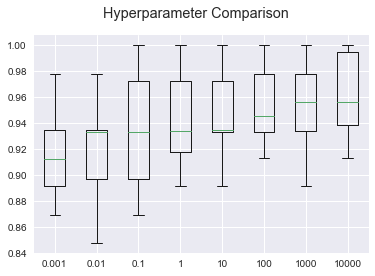

In [6]:
kfold = model_selection.KFold(n_splits=10, random_state=seed) # try with LOOCV too
#Inverse of regularization strength; smaller values specify stronger regularization
C_values_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]

C_score_resuls_list =[]
C_score_dict = {}
for C_value in C_values_list:
	regression_model = LogisticRegression(C=C_value)
	cv_results = model_selection.cross_val_score(regression_model, X_train, Y_train, cv=kfold, scoring=scoring)

	C_score_dict[C_value] =  cv_results.mean()
	C_score_resuls_list.append(cv_results)
	
print C_score_dict
print "Best value for C is: " + str(max(C_score_dict, key=C_score_dict.get))

# Compare Hyperparameters
fig = plt.figure()
fig.suptitle('Hyperparameter Comparison')
ax = fig.add_subplot(111)
plt.boxplot(C_score_resuls_list)
ax.set_xticklabels(C_values_list)
plt.show()

predict on test dataset

In [7]:
regression_model = LogisticRegression(C=10000)
regression_model.fit(X_train,Y_train)
predictions = regression_model.predict(X_test)
print predictions
print confusion_matrix(Y_test, predictions)
print accuracy_score(Y_test, predictions)

['B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'M' 'B' 'B']
[[71  1]
 [ 3 39]]
0.964912280702
